<a href="https://colab.research.google.com/github/dntwaritag/Water_potability/blob/main/Denys's_Clustering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Step 1: Load the dataset (Replace 'your_file.csv' with actual dataset path)
df = pd.read_csv("/content/drive/MyDrive/Mathematics for Machine Learning/water_potability.csv")

# Display first few rows
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
# Step 2: Drop the Target column (Modify column name if necessary)
df.drop(columns=['Potability'], inplace=True, errors='ignore')



In [7]:
# Display first few rows
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [8]:
# Step 3: Handle missing values by replacing NaN with column mean
df.fillna(df.mean(), inplace=True)



In [9]:
# Step 4: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)



In [10]:
# Step 5: Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # Testing clusters from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)



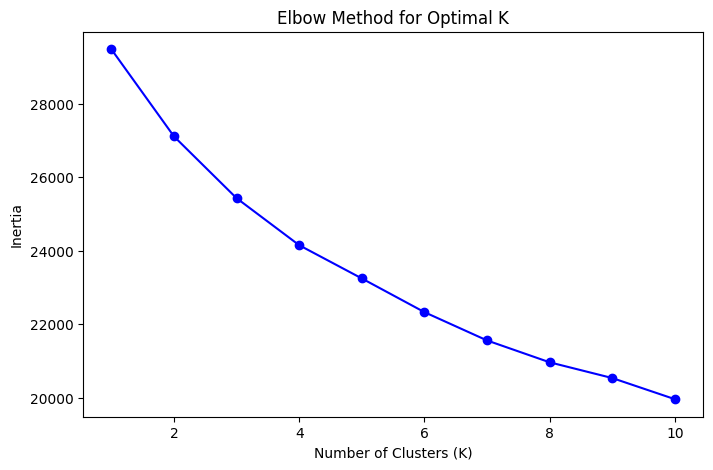

In [11]:
# Step 6: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [12]:
# Step 7: Choose optimal K based on the elbow plot
optimal_k = 3  # Adjust based on the elbow curve result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)



In [13]:
# Step 8: Add cluster labels to the DataFrame
df['Cluster'] = clusters



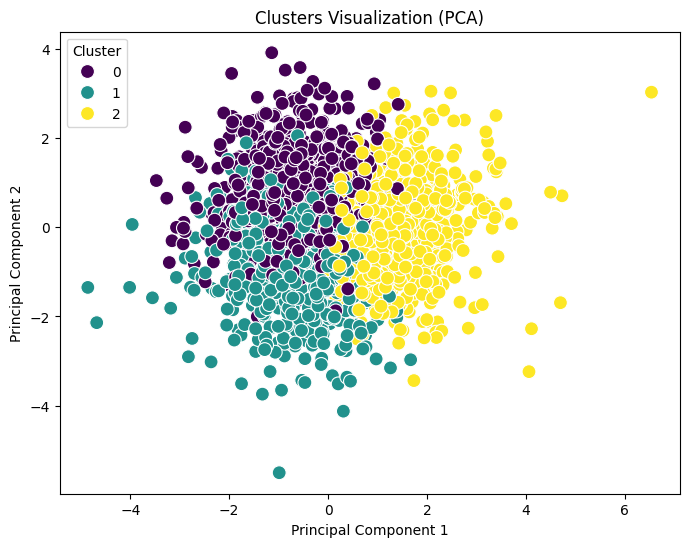

In [14]:
# Step 9: Visualizing the clusters using PCA for 2D scatter plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette="viridis", s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Visualization (PCA)")
plt.legend(title="Cluster")
plt.show()